## Spotify tracks dataset - ETL

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
# Loading data from a CSV file
data = pd.read_csv('dataset.csv')


In [45]:
# Checking the first few rows of the dataset
df = data
df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [46]:
# Droping 'Unnamed: 0' column
df = df.drop(columns=['Unnamed: 0'])
df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

In [48]:
# Checking the missing values in the dataset
df.isnull().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [50]:
# investigate the missing values further
missing_values = df[df.isnull().any(axis=1)]
missing_values

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


In [51]:
# The key data is missed in the row, so we will drop the row
df = df.dropna()
df.isnull().sum()

track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [53]:
# Investigating artists names for duplicates
df['artists'].value_counts()

artists
The Beatles                                                                 279
George Jones                                                                271
Stevie Wonder                                                               236
Linkin Park                                                                 224
Ella Fitzgerald                                                             222
                                                                           ... 
Automatic Tasty                                                               1
o9                                                                            1
Pyotr Ilyich Tchaikovsky;National Philharmonic Orchestra;Richard Bonynge      1
tstewart;Ólafur Arnalds                                                       1
Jesus Culture                                                                 1
Name: count, Length: 31437, dtype: int64

In [54]:
# Removing in the artists names' anomalies like extra spaces or ';' separators
df['artists'] = df['artists'].str.strip()
df['artists'] = df['artists'].str.replace(';', ', ')
df['artists'].value_counts()

artists
The Beatles                                                                   279
George Jones                                                                  271
Stevie Wonder                                                                 236
Linkin Park                                                                   224
Ella Fitzgerald                                                               222
                                                                             ... 
Automatic Tasty                                                                 1
o9                                                                              1
Pyotr Ilyich Tchaikovsky, National Philharmonic Orchestra, Richard Bonynge      1
tstewart, Ólafur Arnalds                                                        1
Jesus Culture                                                                   1
Name: count, Length: 31437, dtype: int64

In [55]:
# Striping leading and trailing spaces from track_id, track_name, album_name, track_genre
df['track_id'] = df['track_id'].str.strip()
df['track_name'] = df['track_name'].str.strip()
df['album_name'] = df['album_name'].str.strip()
df['track_genre'] = df['track_genre'].str.strip()

In [56]:
# Investigating track_id for duplicates
df['track_id'].value_counts()

track_id
6S3JlDAGk3uu3NtZbPnuhS    9
2Ey6v4Sekh3Z0RUSISRosD    8
2kkvB3RNRzwjFdGhaUA0tz    8
08kTa3SL9sV6Iy8KLKtGql    7
4XYieGKSlJlHpzB3bl6WMP    7
                         ..
0kJ7eKX6aWl8X1W5Xrosn6    1
4bYH5445Bn2w9UiGM0NxQw    1
1T5C6ENvpM3IiYeezsK9uI    1
34SatKRJgtXfL0bcgk7HMA    1
2hETkH7cOfqmz3LqZDHZf5    1
Name: count, Length: 89740, dtype: int64

In [57]:
# Checking the rows with duplicate track_ids and sorting them by track_id
duplicate_track_ids = df[df.duplicated(subset=['track_id'], keep=False)]
duplicate_track_ids.sort_values(by='track_id')

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
15028,001APMDOl3qtx1526T11n1,"Pink Sweat$, Kirby",New RnB,Better,0,176320,False,0.613,0.471,1,-6.644,0,0.1070,0.316000,0.000001,0.1170,0.406,143.064,4,chill
103211,001APMDOl3qtx1526T11n1,"Pink Sweat$, Kirby",New RnB,Better,0,176320,False,0.613,0.471,1,-6.644,0,0.1070,0.316000,0.000001,0.1170,0.406,143.064,4,soul
85578,001YQlnDSduXd5LgBd66gT,Soda Stereo,Soda Stereo (Remastered),El Tiempo Es Dinero - Remasterizado 2007,38,177266,False,0.554,0.921,2,-4.589,1,0.0758,0.019400,0.088100,0.3290,0.700,183.571,1,punk-rock
100420,001YQlnDSduXd5LgBd66gT,Soda Stereo,Soda Stereo (Remastered),El Tiempo Es Dinero - Remasterizado 2007,38,177266,False,0.554,0.921,2,-4.589,1,0.0758,0.019400,0.088100,0.3290,0.700,183.571,1,ska
91801,003vvx7Niy0yvhvHt4a68B,The Killers,Hot Fuss,Mr. Brightside,86,222973,False,0.352,0.911,1,-5.230,1,0.0747,0.001210,0.000000,0.0995,0.236,148.033,4,rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72679,7zv2vmZq8OjS54BxFzI2wM,Attila,Soundtrack to a Party (Bonus),Lets Start the Party,25,125859,True,0.592,0.932,1,-5.412,1,0.0558,0.000005,0.859000,0.0730,0.677,133.987,4,metalcore
22326,7zv2vmZq8OjS54BxFzI2wM,Attila,Soundtrack to a Party (Bonus),Lets Start the Party,25,125859,True,0.592,0.932,1,-5.412,1,0.0558,0.000005,0.859000,0.0730,0.677,133.987,4,death-metal
2004,7zwn1eykZtZ5LODrf7c0tS,The Neighbourhood,Hard To Imagine The Neighbourhood Ever Changing,You Get Me So High,83,153000,False,0.551,0.881,7,-6.099,0,0.0542,0.186000,0.079100,0.1520,0.387,88.036,4,alt-rock
3100,7zwn1eykZtZ5LODrf7c0tS,The Neighbourhood,Hard To Imagine The Neighbourhood Ever Changing,You Get Me So High,83,153000,False,0.551,0.881,7,-6.099,0,0.0542,0.186000,0.079100,0.1520,0.387,88.036,4,alternative


In [58]:
# Checking the rows with duplicate track_name
duplicate_track_names = df[df.duplicated(subset=['track_name'], keep=False)]
duplicate_track_names.value_counts()

track_id                artists                                                              album_name                            track_name                                         popularity  duration_ms  explicit  danceability  energy  key  loudness  mode  speechiness  acousticness  instrumentalness  liveness  valence  tempo    time_signature  track_genre
2abeQBWSIzjO8J1KrPFZHy  Oleg Pogudin                                                         Русский романс. Часть I               Забыли вы…                                         0           190933       False     0.474         0.0538  7    -21.541   0     0.0488       0.9120        0.000             0.0901    0.2070   93.964   3               romance        3
0jI5ex80hYYbLQsX3G5Ze7  Hans Zimmer, Henning Lohner, Martin Tillman, Fiachra Trench          Hans Zimmer: Epic Scores              The Well                                           12          684626       False     0.235         0.0975  9    -25.217   0     0.0345       

In [59]:
# Sorting duplicate by track_name for the further check
duplicate_track_ids.sort_values(by='track_name')

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
93397,3KKk48f33mlB56F5L5nbJk,Nikolay Kopylov,Popular Opera Arias,"""Don Carlos"" Roderigo'S Death Aria",0,235547,False,0.167,0.332,1,-9.888,1,0.0359,0.992,0.191,0.1130,0.0527,62.970,4,romance
93440,3KKk48f33mlB56F5L5nbJk,Nikolay Kopylov,Popular Opera Arias,"""Don Carlos"" Roderigo'S Death Aria",0,235547,False,0.167,0.332,1,-9.888,1,0.0359,0.992,0.191,0.1130,0.0527,62.970,4,romance
39446,4yfFraZrNnh2zJTok5fzq7,"Felix Mendelssohn, Christopher Herrick, Simon ...",Klassische Weihnachtsmusik,"""Hark! The Herald Angels Sing""",0,141000,False,0.158,0.210,7,-16.398,1,0.0330,0.953,0.860,0.1530,0.1930,80.984,4,german
16385,4yfFraZrNnh2zJTok5fzq7,"Felix Mendelssohn, Christopher Herrick, Simon ...",Klassische Weihnachtsmusik,"""Hark! The Herald Angels Sing""",0,141000,False,0.158,0.210,7,-16.398,1,0.0330,0.953,0.860,0.1530,0.1930,80.984,4,classical
32514,2Bc4llhjJBW77I552RgA3L,Aphex Twin,Selected Ambient Works Volume II,#3,64,464293,False,0.167,0.071,6,-27.108,0,0.0410,0.911,0.855,0.1070,0.0613,143.315,5,electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70244,4JrGpUQothsSVR6iBhR9NC,"Namewee, Leehom Wang",亞洲通車,飄向北方,55,269181,False,0.500,0.778,0,-4.658,0,0.1260,0.387,0.000,0.1600,0.2790,173.906,4,mandopop
12313,0FBjsiiUFLET2xqeKVrGBE,Eason Chan,我的快樂時代 (華星40系列),黃金時代,46,248040,False,0.555,0.494,4,-6.862,1,0.0285,0.246,0.000,0.2910,0.2800,144.044,4,cantopop
70665,0FBjsiiUFLET2xqeKVrGBE,Eason Chan,我的快樂時代 (華星40系列),黃金時代,46,248040,False,0.555,0.494,4,-6.862,1,0.0285,0.246,0.000,0.2910,0.2800,144.044,4,mandopop
102506,5LiWJsSSjZh7Y3hqml18Ki,Eddy Kim,당신이 잠든 사이에 Pt. 1 Original Television Soundtrack,긴 밤이 오면,56,226991,False,0.480,0.501,5,-5.511,1,0.0296,0.624,0.000,0.0748,0.2220,110.889,4,songwriter


In [60]:
# Deleting duplicate track_name rows with the same track_genre and track_id, keeping the first occurrence
df = df.drop_duplicates(subset=['track_name', 'track_genre', 'track_id'], keep='first')


In [61]:
# Reseting df index
df = df.reset_index(drop=True)

In [62]:
# For further investigation, saving the track_genre names to a separate CSV file
df_genre = df['track_genre'].unique()
df_genre_df = pd.DataFrame(df_genre, columns=['track_genre'])
df_genre_df.to_csv('track_genres.csv', index=False)

In [63]:
# Adding a new column that combines similar genres into broader categories.
# Use a dictionary of genre strings to check the 'track_genre' column
common_strings = {
    'rock': 'rock',
    'grunge': 'rock',
    'alternative': 'rock',
    'pop': 'pop',
    'j-': 'jazz',
    'latin': 'latino',
    'latino': 'latino',
    'jazz': 'jazz',
    'hard': 'hard',
    'electro': 'electronic',
    'dance': 'dance',
    'metal': 'metal',
    'grindcore': 'metal',
    'songwriter': 'songwriter',
    'idm': 'dance',
    'house': 'house',
    'techno': 'techno',
    'punk': 'punk',
    'reggae': 'reggae',
    'blues': 'blues',
    'r-n-b': 'blues',
    'pagode': 'brazilian',
    'brazil': 'brazilian',
    'mpb': 'brazilian',
    'samba': 'brazilian',
    'forro': 'brazilian',
    'malay': 'malaysian',
    'kids': 'children',
    'children': 'children',
    'edm': 'electronic',
    'dubstep': 'electronic',
    'breakbeat': 'electronic',
    'honky-tonk': 'country'
}

df['track_genre_category'] = df['track_genre'].apply(lambda genre: 
                                                     next((value for key, value in common_strings.items() if key in genre.lower()), genre))
df['track_genre_category'].value_counts()

track_genre_category
rock          9990
pop           8983
metal         5990
brazilian     4996
electronic    4989
              ... 
hip-hop        991
iranian        988
german         963
classical      933
romance        904
Name: count, Length: 68, dtype: int64

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113549 entries, 0 to 113548
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   track_id              113549 non-null  object 
 1   artists               113549 non-null  object 
 2   album_name            113549 non-null  object 
 3   track_name            113549 non-null  object 
 4   popularity            113549 non-null  int64  
 5   duration_ms           113549 non-null  int64  
 6   explicit              113549 non-null  bool   
 7   danceability          113549 non-null  float64
 8   energy                113549 non-null  float64
 9   key                   113549 non-null  int64  
 10  loudness              113549 non-null  float64
 11  mode                  113549 non-null  int64  
 12  speechiness           113549 non-null  float64
 13  acousticness          113549 non-null  float64
 14  instrumentalness      113549 non-null  float64
 15  

In [65]:
df.isnull().sum()

track_id                0
artists                 0
album_name              0
track_name              0
popularity              0
duration_ms             0
explicit                0
danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
time_signature          0
track_genre             0
track_genre_category    0
dtype: int64

In [66]:
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,track_genre_category
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,...,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,...,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,"Ingrid Michaelson, ZAYN",To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,...,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,...,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,...,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,acoustic


In [67]:
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,113549.000000,1.135490e+05,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000
mean,33.324433,2.280814e+05,0.567031,0.642091,5.309452,-8.243408,0.637866,0.084674,0.314064,0.155703,0.213613,0.474205,122.175745,3.904218
std,22.283855,1.064131e+05,0.173409,0.251053,3.560147,5.011422,0.480620,0.105762,0.331906,0.309217,0.190462,0.259204,29.972954,0.432117
min,0.000000,8.586000e+03,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.741840e+05,0.456000,0.473000,2.000000,-9.998000,0.000000,0.035900,0.016800,0.000000,0.098000,0.260000,99.296000,4.000000
50%,35.000000,2.130000e+05,0.580000,0.685000,5.000000,-6.997000,1.000000,0.048900,0.168000,0.000041,0.132000,0.464000,122.020000,4.000000
75%,50.000000,2.615880e+05,0.695000,0.854000,8.000000,-5.001000,1.000000,0.084500,0.596000,0.048700,0.273000,0.683000,140.074000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


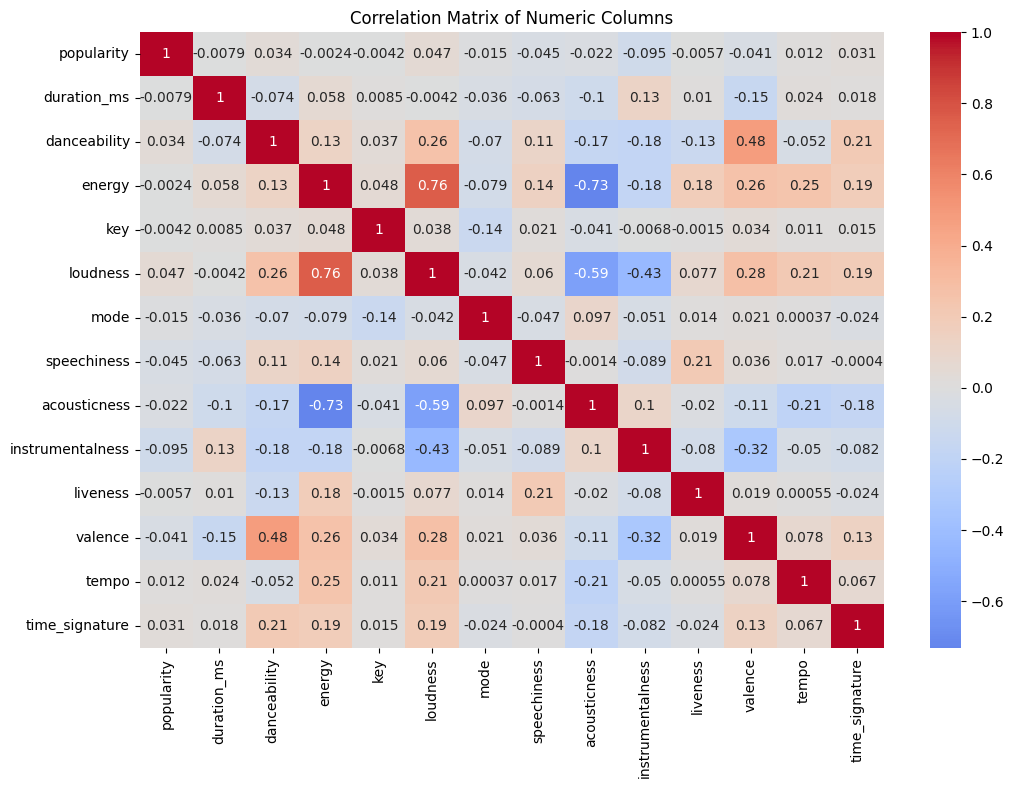

In [ ]:
# Checking columns correlation

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

In [73]:
# Normalising loudness
df['loudness'] = (df['loudness'] - df['loudness'].min()) / (df['loudness'].max() - df['loudness'].min())
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,113549.000000,1.135490e+05,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000
mean,33.324433,2.280814e+05,0.567031,0.642091,5.309452,0.763694,0.637866,0.084674,0.314064,0.155703,0.213613,0.474205,122.175745,3.904218
std,22.283855,1.064131e+05,0.173409,0.251053,3.560147,0.092696,0.480620,0.105762,0.331906,0.309217,0.190462,0.259204,29.972954,0.432117
min,0.000000,8.586000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.741840e+05,0.456000,0.473000,2.000000,0.731239,0.000000,0.035900,0.016800,0.000000,0.098000,0.260000,99.296000,4.000000
50%,35.000000,2.130000e+05,0.580000,0.685000,5.000000,0.786749,1.000000,0.048900,0.168000,0.000041,0.132000,0.464000,122.020000,4.000000
75%,50.000000,2.615880e+05,0.695000,0.854000,8.000000,0.823669,1.000000,0.084500,0.596000,0.048700,0.273000,0.683000,140.074000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,1.000000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [74]:
# Saving cleaned data to a new CSV file
df.to_csv('cleaned_dataset.csv', index=False)